<a href="https://colab.research.google.com/github/avushek2305/Smai-Assignment-3/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

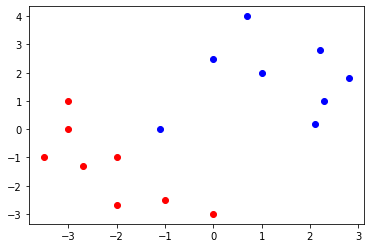

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],   
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

z = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])






plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

optimization problem: 

# **used for hard constraints**

**minimize**: (1/2) * ||w||^2 

**wrt**: y_i * (w^T @x_i + b) >= 1 



---



---



# **used for soft constraints**

**minimize**: (1/2) * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T @ x_i + b))) 

**wrt**: y_i * (w^T @x_i + b) >= 1 - z_i,  z_i >= 0


Here, **w** and **b** are the weight vector and bias term, respectively.
**C** is the regularization parameter that controls the trade-off between the margin width and the number of margin violations. 

The variables **z_i** are slack variables that allow for some misclassification errors.





---
The equivalent Lagrangian form (dual form):

L(alpha) = sum(alpha_i) - 1/2 * sum(sum(alpha_i * alpha_j * y_i * y_j * x_i^T x_j))

wrt: alpha_i >= 0 and sum(alpha_i * y_i)  = 0


In [ ]:
def svm_fit(X,y):
  m,n = np.shape(X)

  W = cp.Variable(n) # Weight matrix

  b = cp.Variable() # Gamma term
  
  constraints = [ y[i]*(X[i] @ W + b) - 1 >= 0 for i in range(m)]
  objective = cp.Minimize(cp.square(cp.norm(W))/2) 

  prob = cp.Problem(objective, constraints)
  prob. solve()

  print("optimal value of W:", W.value)
  print("optimal value of b:", b.value)

  return W.value, b.value







In [ ]:
def plot_svm(w0,w1,b,X,y):
  plot_points(X, y)
  x1 = np.linspace(-4, 4, 50)
  x2 = -(w0*x1 + b)/w1
  plt.plot(x1, x2, 'k-')
  x2 = -(w0*x1 + b + 1)/w1
  plt.plot(x1, x2, 'k--')
  x2 = -(w0*x1 + b - 1)/w1
  plt.plot(x1, x2, 'k--')
  plt.show()





In [ ]:
w,b = svm_fit(X,y)



optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

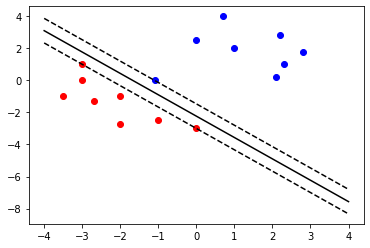

In [ ]:
# Write your code here
plot_svm(w[0],w[1],b,X,y)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
toinsert = np.array([[-4,-10],[4,4]])
lable = np.array([1,-1])
x = np.vstack((X,toinsert))
Y = np.concatenate((y,lable))
Y.shape

(18,)

optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.913043478291523


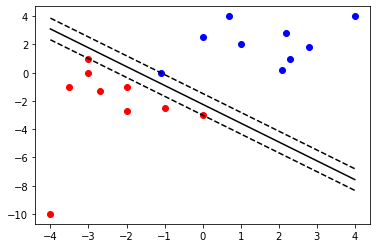

In [ ]:
# Solve for the decision boundary using this modified dataset
w,b = svm_fit(x,Y)
plot_svm(w[0],w[1],b,x,Y)
# plot_points(x,Y)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [ ]:

def svm_fit_optimized(X,y,c):
  m,n = np.shape(X)

  W = cp.Variable(n) # Weight matrix
  Psi = cp.Variable(m) #slack variable
  b = cp.Variable() # Gamma term
  C = c
  constraints = [ (y[i]*(X[i] @ W + b) - 1 + Psi[i] >= 0) for i in range(m)]
  constraints += [Psi[i] >=0  for i in range(m)]
  objective = cp.Minimize(cp.square(cp.norm(W))/2 + C*cp.sum(Psi)) 

  prob = cp.Problem(objective, constraints)
  prob. solve()

  print("optimal value of W:", W.value)
  print("optimal value of b:", b.value)

  return W.value, b.value

optimal value of W: [-0.22506619 -0.19858782]
optimal value of b: 0.01368050664778419


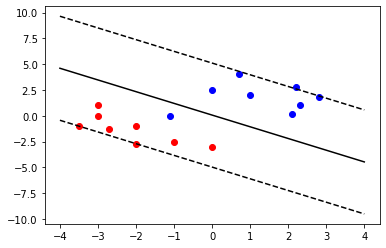

In [ ]:
# Write your code here for C= 0.01

w,b = svm_fit_optimized(X,y,0.01)
plot_svm(w[0],w[1],b,X,y)

optimal value of W: [-0.38493724 -0.35146444]
optimal value of b: -0.12133891206805861


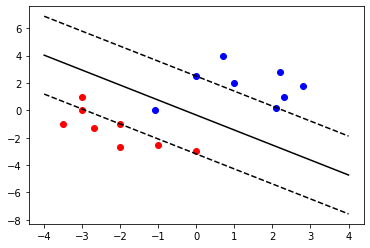

In [ ]:
# Write your code here for C= 0.1
w,b = svm_fit_optimized(X,y,0.1)
plot_svm(w[0],w[1],b,X,y)

optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.913043478232309


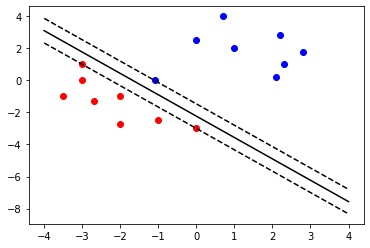

In [ ]:
# Write your code here for C= 3
w,b = svm_fit_optimized(X,y,3)
plot_svm(w[0],w[1],b,X,y)

optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.9130434784825505


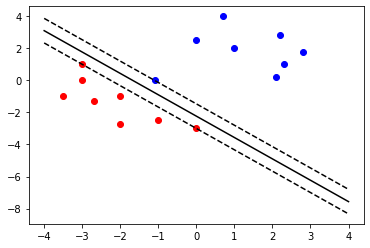

In [ ]:
# Write your code here for C= 10
w,b = svm_fit_optimized(X,y,10)
plot_svm(w[0],w[1],b,X,y)

optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.9130434782683894


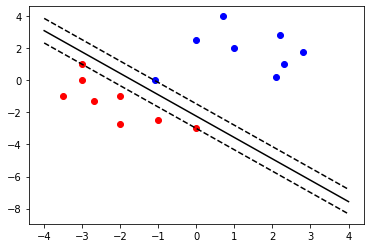

In [ ]:
# Write your code here for C= 100
w,b = svm_fit_optimized(X,y,100)
plot_svm(w[0],w[1],b,X,y)

#[-3, 1] [-2, -1] [0, -3], [-1.1, 0]

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [ ]:
# Write your Code here
w,b = svm_fit_optimized(X,y,100)
toremove = []
w0,w1 = w[0],w[1]
for i in range(X.shape[0]):
  prediction = np.dot(w, X[i]) + b + 1
  margin = y[i] * prediction 
  if margin <= 1:
      toremove.append(i)
for i in range(X.shape[0]):
  prediction = np.dot(w, X[i]) + b - 1
  margin = y[i] * prediction
  if margin <= 1:
      toremove.append(i)



optimal value of W: [-1.73913043 -1.30434783]
optimal value of b: -2.9130434782683894


In [ ]:
X_train_new = np.delete(X, toremove, axis=0)
y_train_new = np.delete(y, toremove)

In [ ]:
w,b = svm_fit_optimized(X_train_new,y_train_new,100)

optimal value of W: [-0.39344364 -0.32786764]
optimal value of b: -0.18033091031353635


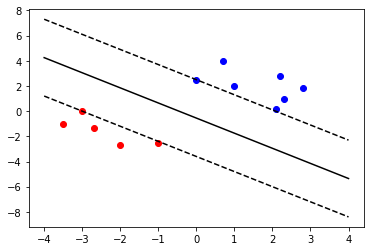

In [ ]:
plot_svm(w[0],w[1],b,X_train_new,y_train_new)

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-23 05:18:04--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-23 05:18:04 (85.8 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-23 05:18:05--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def Svc_linear(C ,X_train,y_train,X_test,y_test,g = "scale"):
  linear_svm = SVC(kernel='linear',C = C,gamma=g)

  linear_svm.fit(X_train, y_train)

  y_pred = linear_svm.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred,average = "weighted")
  cm = confusion_matrix(y_test, y_pred)



  print(f"[Accuracy score: {acc}]")
  print(f"[F1-score: {f1}]")
  print(f"Confusion matrix:\n{cm}") 

def Svc_poly(degree,X_train,y_train,X_test,y_test):
  poly_svm = SVC(kernel='poly', degree=degree)

  poly_svm.fit(X_train, y_train)

  y_pred = poly_svm.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  cm = confusion_matrix(y_test, y_pred)
  
  print(f"[Accuracy score: {acc}]")
  print(f"[F1-score: {f1}]")
  print(f"Confusion matrix:\n{cm}") 



def Svm_sigmoid(X_train,y_train,X_test,y_test):
  sigmoid_svm = SVC(kernel='sigmoid')
  sigmoid_svm.fit(X_train, y_train)
  y_pred = sigmoid_svm.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  cm = confusion_matrix(y_test, y_pred)

  print(f"[Accuracy score: {acc}]")
  print(f"[F1-score: {f1}]")
  print(f"Confusion matrix:\n{cm}") 

def Svm_RBF(X_train,y_train,X_test,y_test):
  sigmoid_svm = SVC(kernel='rbf')
  sigmoid_svm.fit(X_train, y_train)
  y_pred = sigmoid_svm.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  cm = confusion_matrix(y_test, y_pred)

  print(f"[Accuracy score: {acc}]")
  print(f"[F1-score: {f1}]")
  print(f"Confusion matrix:\n{cm}") 

In [ ]:
  # Train and test a linear SVM model with C=0.1
print("<<------------------  linear SVM model with C=0.1 and gamma = 1 ----------------->>")
Svc_linear(0.1,X_train,y_train,X_test,y_test,1)

print("<<------------------- linear SVM model with C=10 and gamma = 0.001 ------------------>>")
# Train and test a linear SVM model with C=10

Svc_linear(10,X_train,y_train,X_test,y_test,0.001)

# Train and test a linear SVM model with C=0.1
print("<<------------------  linear SVM model with C=0.1 and gamma = 0.001 ----------------->>")
Svc_linear(0.1,X_train,y_train,X_test,y_test,0.001)

print("<<------------------- linear SVM model with C=10 and gamma = 1------------------>>")
# Train and test a linear SVM model with C=10

Svc_linear(10,X_train,y_train,X_test,y_test,0.01)



# Train and test a polynomial SVM model with degree=2
print("<<------------------- polynomial SVM and degree=2 ------------------>>")
Svc_poly(2,X_train,y_train,X_test,y_test)


# Train and test a polynomial SVM model with degree=4
print("<<------------------- polynomial SVM and degree=4 ------------------>>")
Svc_poly(4,X_train,y_train,X_test,y_test)


# Train and test a Sigmoid SVM model
print("<<------------------- Sigmoid SVM  ------------------>>")
Svm_sigmoid(X_train,y_train,X_test,y_test)

# Train and test a  RBF SVM model
print("<<------------------- RBF SVM ------------------>>")
Svm_RBF(X_train,y_train,X_test,y_test)





<<------------------  linear SVM model with C=0.1 and gamma = 1 ----------------->>
[Accuracy score: 0.8893333333333333]
[F1-score: 0.8890444070271425]
Confusion matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]
<<------------------- linear SVM model with C=10 and gamma = 0.001 ------------------>>
[Accuracy score: 0.8893333333333333]
[F1-score: 0.8890444070271425]
Confusion matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2 